<a href="https://colab.research.google.com/github/jay-kanakia/YouTube-comment-analyzer/blob/main/YouTube_comment_analyzer_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [5]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [6]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(37149, 2)

In [9]:
df.duplicated().sum()

np.int64(350)

In [10]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(36799, 2)

In [13]:
df[df['clean_comment'].str.strip()=='']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [14]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [15]:
df.shape

(36793, 2)

In [16]:
# Lowering
df['clean_comment']=df['clean_comment'].str.lower()

In [17]:
#Removing leading and trailing spaces
df[df['clean_comment'].apply(lambda x : x.startswith(' ') or x.endswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [19]:
df['clean_comment']=df['clean_comment'].str.strip()

In [21]:
df[df['clean_comment'].apply(lambda x : x.startswith(' ') or x.endswith(' '))]

,clean_comment,category


In [28]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
df[df['clean_comment'].str.contains(url_pattern,regex=True)]

,clean_comment,category


In [30]:
# EDA

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

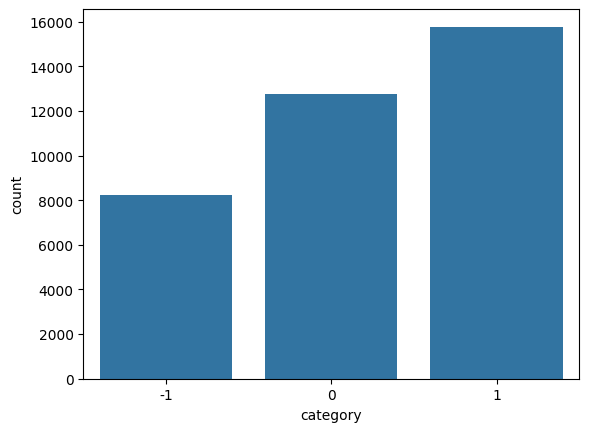

In [34]:
sns.countplot(data=df,x='category')

In [39]:
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [41]:
#Word Count
df['word_count']=df['clean_comment'].apply(lambda x : len(x.split()))

<Axes: xlabel='word_count', ylabel='Density'>

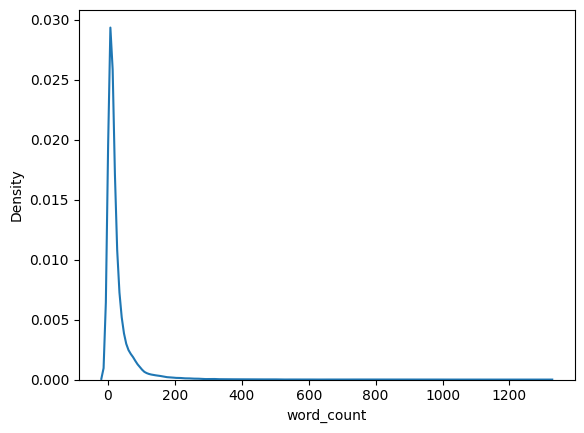

In [42]:
sns.kdeplot(df['word_count'])

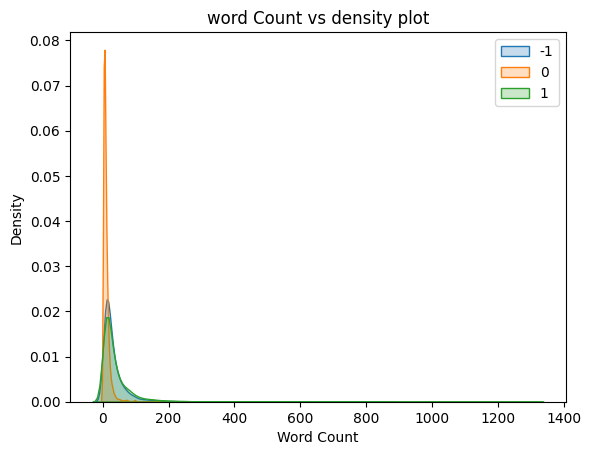

In [46]:
sns.kdeplot(df[df['category']==-1]['word_count'],fill=True,label='-1')
sns.kdeplot(df[df['category']==0]['word_count'],fill=True,label='0')
sns.kdeplot(df[df['category']==1]['word_count'],fill=True,label='1')
plt.title('word Count vs density plot')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: ylabel='word_count'>

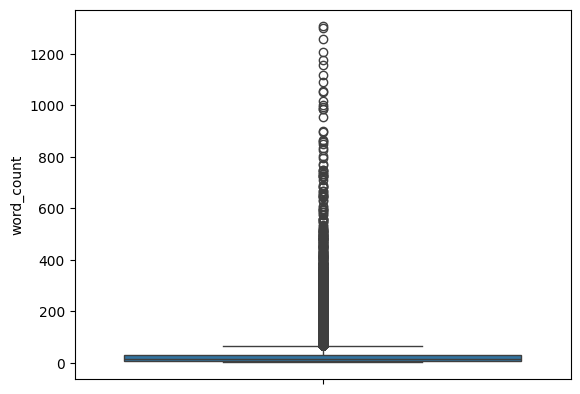

In [47]:
# Box plot
sns.boxplot(df['word_count'])

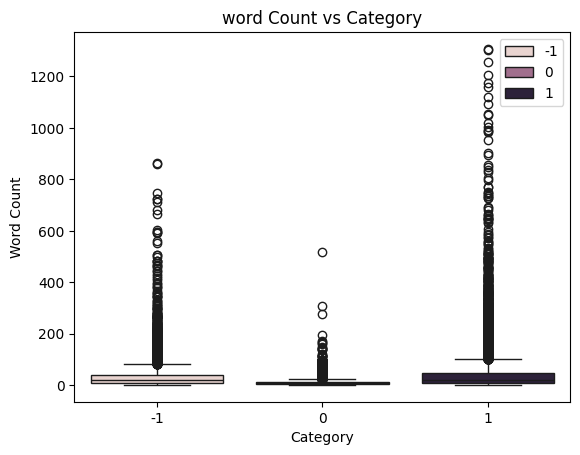

In [51]:
sns.boxplot(data=df,x='category',y='word_count',hue='category')
plt.title('word Count vs Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

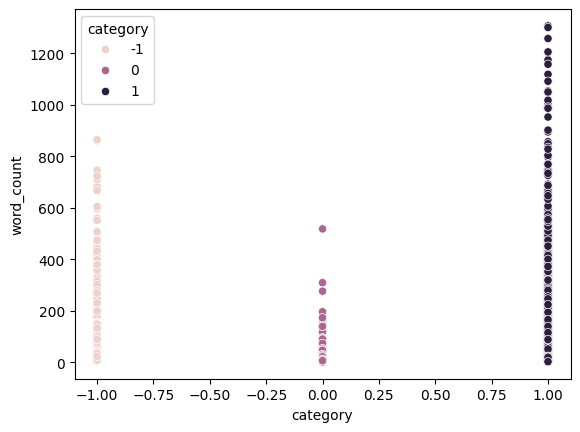

In [52]:
sns.scatterplot(data=df,x='category',y='word_count',hue='category')

<Axes: xlabel='category', ylabel='word_count'>

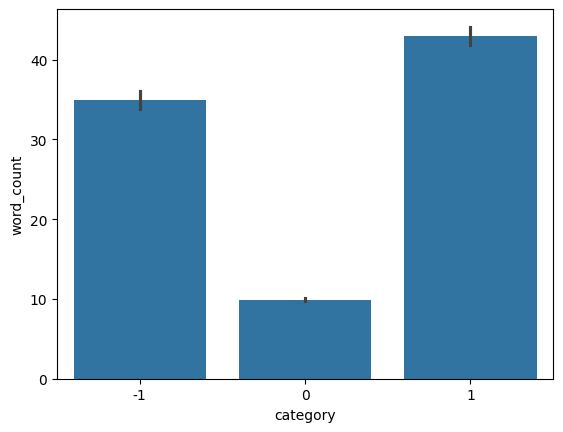

In [54]:
# bar plot
sns.barplot(data=df,x='category',y='word_count')

<Axes: xlabel='category', ylabel='word_count'>

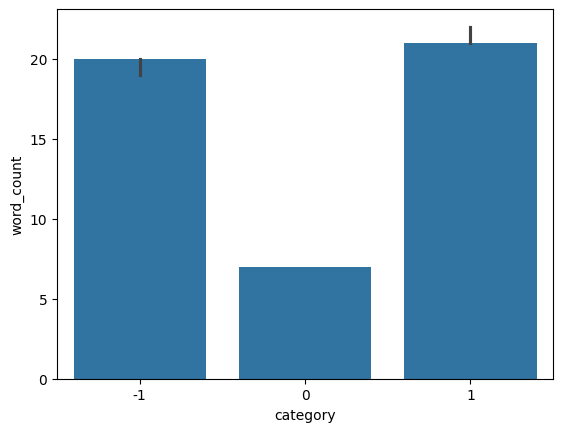

In [55]:
sns.barplot(data=df,x='category',y='word_count',estimator='median')

In [57]:
!pip install nltk

import nltk
from nltk.corpus import stopwords
nltk.download('punk_tab')
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))

[nltk_data] Error loading punk_tab: Package 'punk_tab' not found in
[nltk_data]     index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
df['stop_word_count']=df['clean_comment'].apply(lambda x : len([i for i in x.split() if i in stop_words]))

In [65]:
df.sample(3)

,clean_comment,category,word_count,stop_word_count
8248,rispondo alla alla giusto per precisare idea c...,0,59,0
636,goddamn rajdeep and prannoy studios are too bu...,1,12,3
15383,grab couple the gr8 get the league club lol,1,9,2


<Axes: xlabel='stop_word_count', ylabel='Density'>

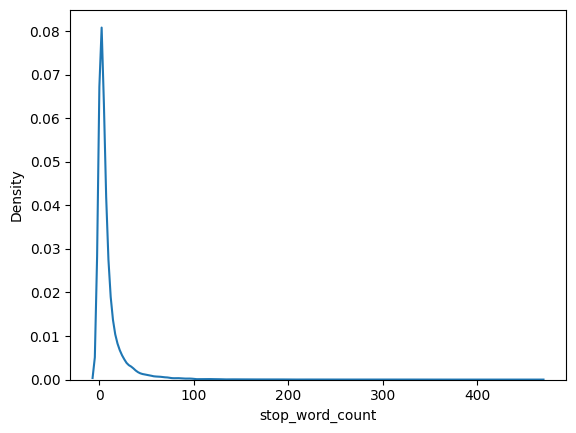

In [66]:
# EDA
sns.kdeplot(df['stop_word_count'])

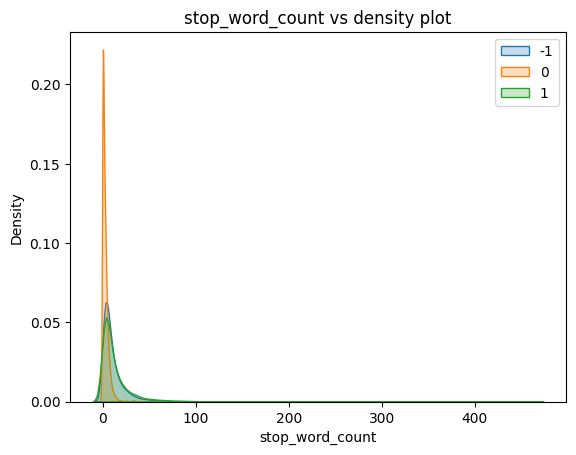

In [67]:
sns.kdeplot(df[df['category']==-1]['stop_word_count'],fill=True,label='-1')
sns.kdeplot(df[df['category']==0]['stop_word_count'],fill=True,label='0')
sns.kdeplot(df[df['category']==1]['stop_word_count'],fill=True,label='1')
plt.title('stop_word_count vs density plot')
plt.xlabel('stop_word_count')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='stop_word_count'>

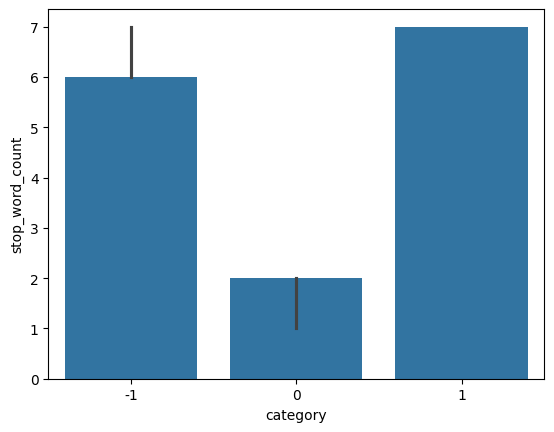

In [68]:
sns.barplot(data=df,x='category',y='stop_word_count',estimator='median')

In [72]:
from collections import Counter
stop_word_corpus=[word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
count=Counter(stop_word_corpus)
most_common_25=count.most_common(25)
most_common_25_df=pd.DataFrame(most_common_25,columns=['stop_word','count'])

In [73]:
most_common_25_df

,stop_word,count
0,the,57669
1,and,28950
2,that,15372
3,this,13463
4,for,12976
5,you,11723
6,are,10566
7,not,8691
8,they,8654
9,have,8380


<Axes: xlabel='count', ylabel='stop_word'>

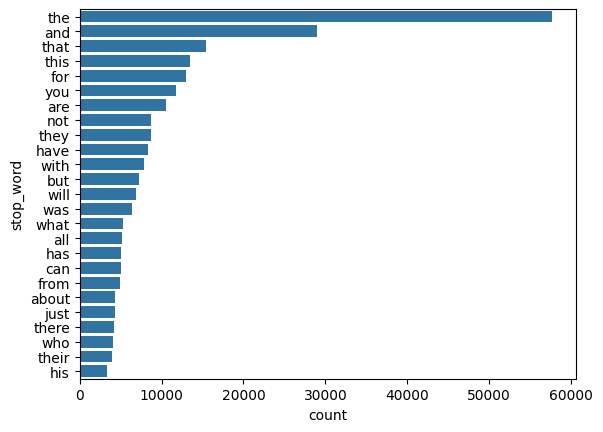

In [74]:
sns.barplot(data=most_common_25_df,x='count',y='stop_word')

In [78]:
# num character

df['char_count']=df['clean_comment'].apply(lambda x: len([i for i in x]))

In [79]:
df.sample(3)

,clean_comment,category,word_count,stop_word_count,char_count
36974,remember that when the lynching news was going...,1,25,10,161
5092,another child the while admire your perspectiv...,1,364,127,2296
8278,religioni sono state inventate sono state sono...,0,109,0,774


In [90]:
char_corpus= ''.join(df['clean_comment'])
char_count=Counter(char_corpus)
char_count_df=pd.DataFrame(char_count.items(),columns=['char','count'])

In [93]:
char_count_df.tail(25)

,char,count
1354,ڈ,1
1355,چ,2
1356,پ,1
1357,ڑ,1
1358,آ,1
1359,ַ,2
1360,ּ,3
1361,ֹ,1
1362,֖,2
1363,ֶ,5


In [96]:
# Punctuation count

import string

exclude=string.punctuation

df['punc_count']=df['clean_comment'].apply(lambda x : sum([1 for i in x if i in exclude]))

In [97]:
df['punc_count'].describe()

,punc_count
count,36793.000000
mean,0.022531
std,0.765155
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,136.000000


In [101]:
import re
df['clean_comment']=df['clean_comment'].apply(lambda x : re.sub(r'[^a-zA-Z0-9\s?.,!]','',str(x)))

In [104]:
df[df['clean_comment'].str.contains(r'\n',regex=True)]

,clean_comment,category,word_count,stop_word_count,char_count,punc_count
448,what missing jpg\nand why this brilliant edit ...,1,22,8,130,0
781,india has been ruined congress and populist sc...,-1,179,62,1073,0
847,like aap for its stand corruption and making p...,-1,75,26,485,0
871,reduced trade\ndeficit stronger rupee aren the...,0,12,4,74,0
1354,amsa press conference australian maritime safe...,1,895,273,5977,0
...,...,...,...,...,...,...
35128,o 2016 sughosh bansal mission make india has f...,-1,76,21,585,0
35230,yikes the title should blind bhakts modi hater...,1,106,27,736,0
36187,hahahahahhahahah \niska klpd hogya,0,4,0,33,0
36517,\n,0,10,0,25,0


In [106]:
df['clean_comment']=df['clean_comment'].str.replace(r'\n',' ',regex=True)

In [107]:
df[df['clean_comment'].str.contains(r'\n',regex=True)]

,clean_comment,category,word_count,stop_word_count,char_count,punc_count


In [108]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation

char_corpus= ''.join(df['clean_comment'])
char_count=Counter(char_corpus)
char_count_df=pd.DataFrame(char_count.items(),columns=['char','count'])
char_count_df.tail(25)

,char,count
16,p,135139
17,s,355279
18,u,170377
19,z,5725
20,k,62531
21,g,132927
22,c,167821
23,q,5136
24,b,88199
25,w,110522


In [112]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

df['clean_comment']=df['clean_comment'].apply(lambda x : ' '.join([lemma.lemmatize(i) for i in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [122]:
# Removing stopwords with some exception

new_stop_word=stop_words-set({'not', 'but', 'however', 'no', 'yet'})

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in new_stop_word])
)

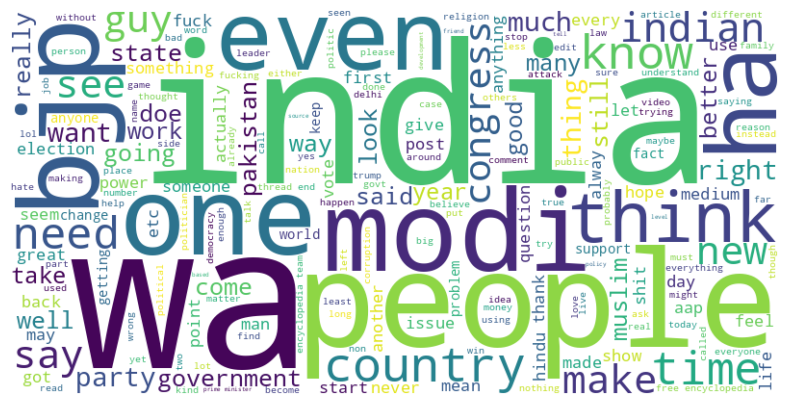

In [124]:
from wordcloud import WordCloud
word_corpus=' '.join(df['clean_comment'])
wc=WordCloud(width=800, height=400, background_color='white')
img=wc.generate(word_corpus)
plt.figure(figsize=(10, 5))
plt.imshow(img,interpolation='bilinear')
plt.axis("off")
plt.show()

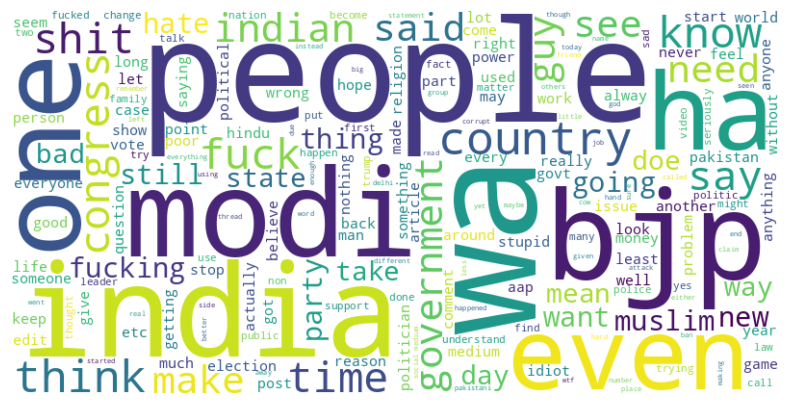

In [125]:
from wordcloud import WordCloud
word_corpus=' '.join(df[df['category'] == -1]['clean_comment'])
wc=WordCloud(width=800, height=400, background_color='white')
img=wc.generate(word_corpus)
plt.figure(figsize=(10, 5))
plt.imshow(img,interpolation='bilinear')
plt.axis("off")
plt.show()

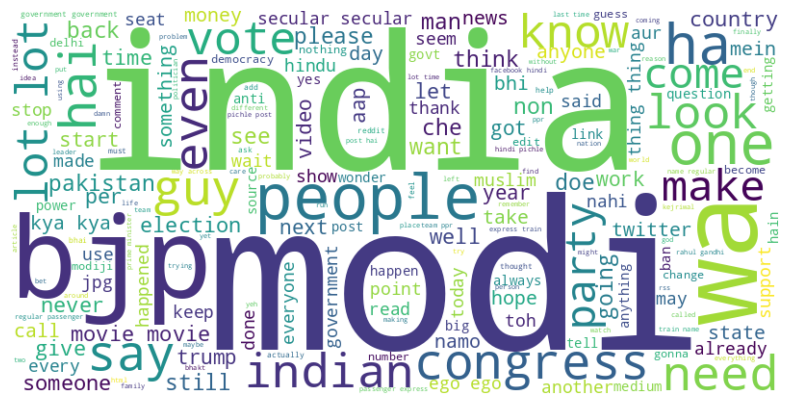

In [126]:
from wordcloud import WordCloud
word_corpus=' '.join(df[df['category'] == 0]['clean_comment'])
wc=WordCloud(width=800, height=400, background_color='white')
img=wc.generate(word_corpus)
plt.figure(figsize=(10, 5))
plt.imshow(img,interpolation='bilinear')
plt.axis("off")
plt.show()

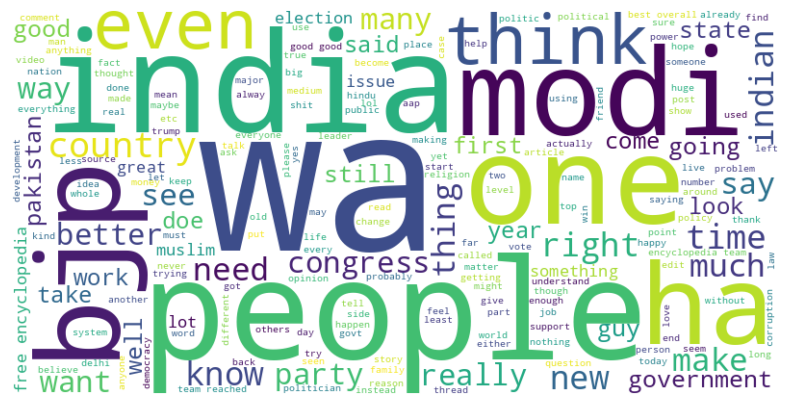

In [127]:
from wordcloud import WordCloud
word_corpus=' '.join(df[df['category'] == 1]['clean_comment'])
wc=WordCloud(width=800, height=400, background_color='white')
img=wc.generate(word_corpus)
plt.figure(figsize=(10, 5))
plt.imshow(img,interpolation='bilinear')
plt.axis("off")
plt.show()

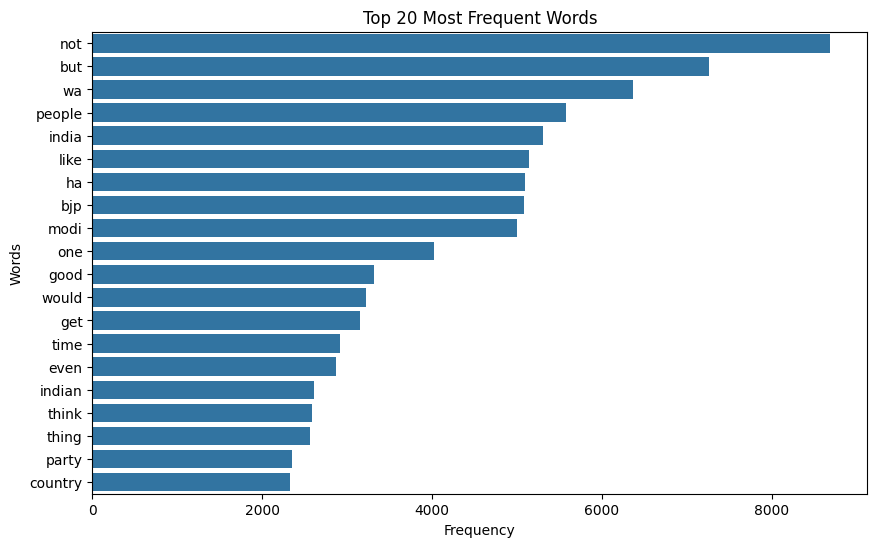

In [144]:
corpus=' '.join(df['clean_comment']).split()
count=Counter(corpus)
count_top_20=count.most_common(20)
words,counts=zip(*count_top_20)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [145]:
df.sample(5)

,clean_comment,category,word_count,stop_word_count,char_count,punc_count
28565,people forgetting fact iaf said electronic sig...,-1,26,11,162,0
24087,money spent exactly kaka intended full name sc...,1,39,16,223,0
18331,bjp ha forked tongue strategy come talking peo...,1,142,52,905,0
4853,sorry,-1,4,3,20,0
35594,4chan friend,0,4,2,22,0


In [146]:
df.to_csv('preprocessed_data_yt_comment_analyzer')